In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
file_path = '/Users/gim-yuseong/Desktop/PycharmProjects/2024_3-1AI/seeds_dataset.txt'

column_names = ["area ", "perimeter ", "compactness ", "length of kernel", "width of kernel", "asymmetry coefficient", "length of kernel groove", "class"]          

df = pd.read_csv(file_path, header=None, names=column_names, delimiter='\s+')

df.head(10)

area   perimeter   compactness   length of kernel  width of kernel  \
0  15.26       14.84        0.8710             5.763            3.312   
1  14.88       14.57        0.8811             5.554            3.333   
2  14.29       14.09        0.9050             5.291            3.337   
3  13.84       13.94        0.8955             5.324            3.379   
4  16.14       14.99        0.9034             5.658            3.562   
5  14.38       14.21        0.8951             5.386            3.312   
6  14.69       14.49        0.8799             5.563            3.259   
7  14.11       14.10        0.8911             5.420            3.302   
8  16.63       15.46        0.8747             6.053            3.465   
9  16.44       15.25        0.8880             5.884            3.505   

   asymmetry coefficient  length of kernel groove  class  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1  
5                  2.462                    4.956      1  
6                  3.586                    5.219      1  
7                  2.700                    5.000      1  
8                  2.040                    5.877      1  
9                  1.969                    5.533      1

In [4]:
df.isnull().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
class                      0
dtype: int64

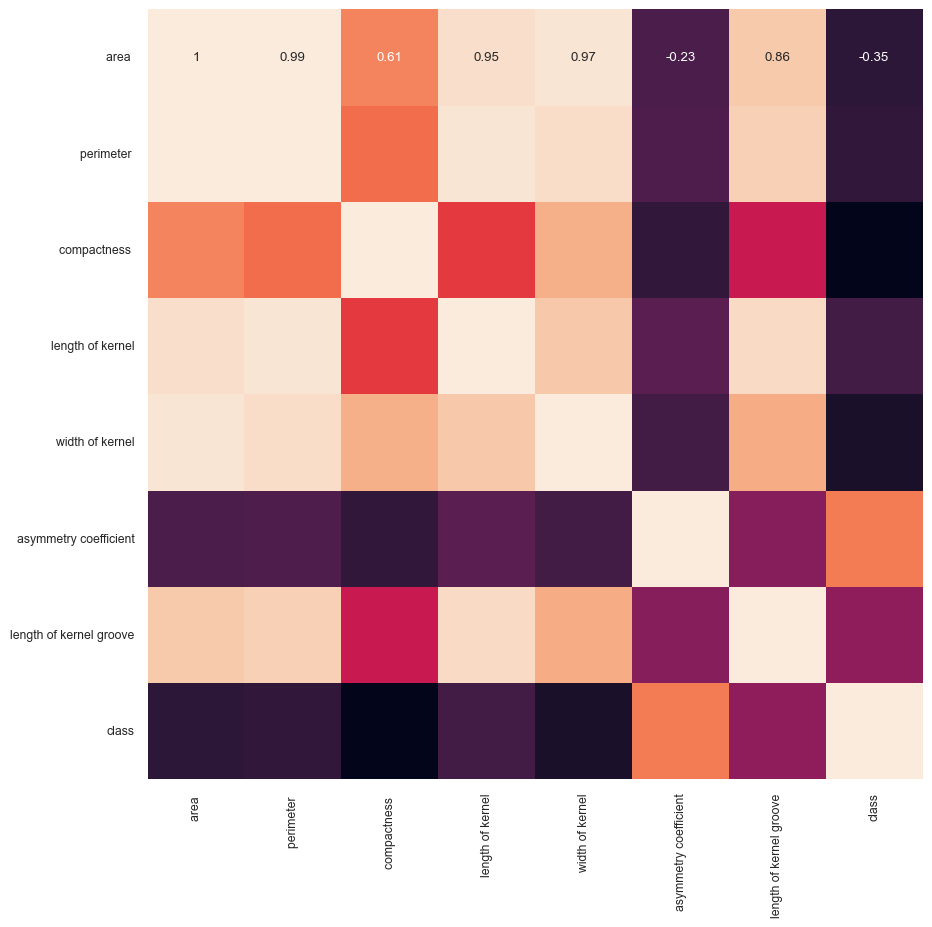

In [6]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

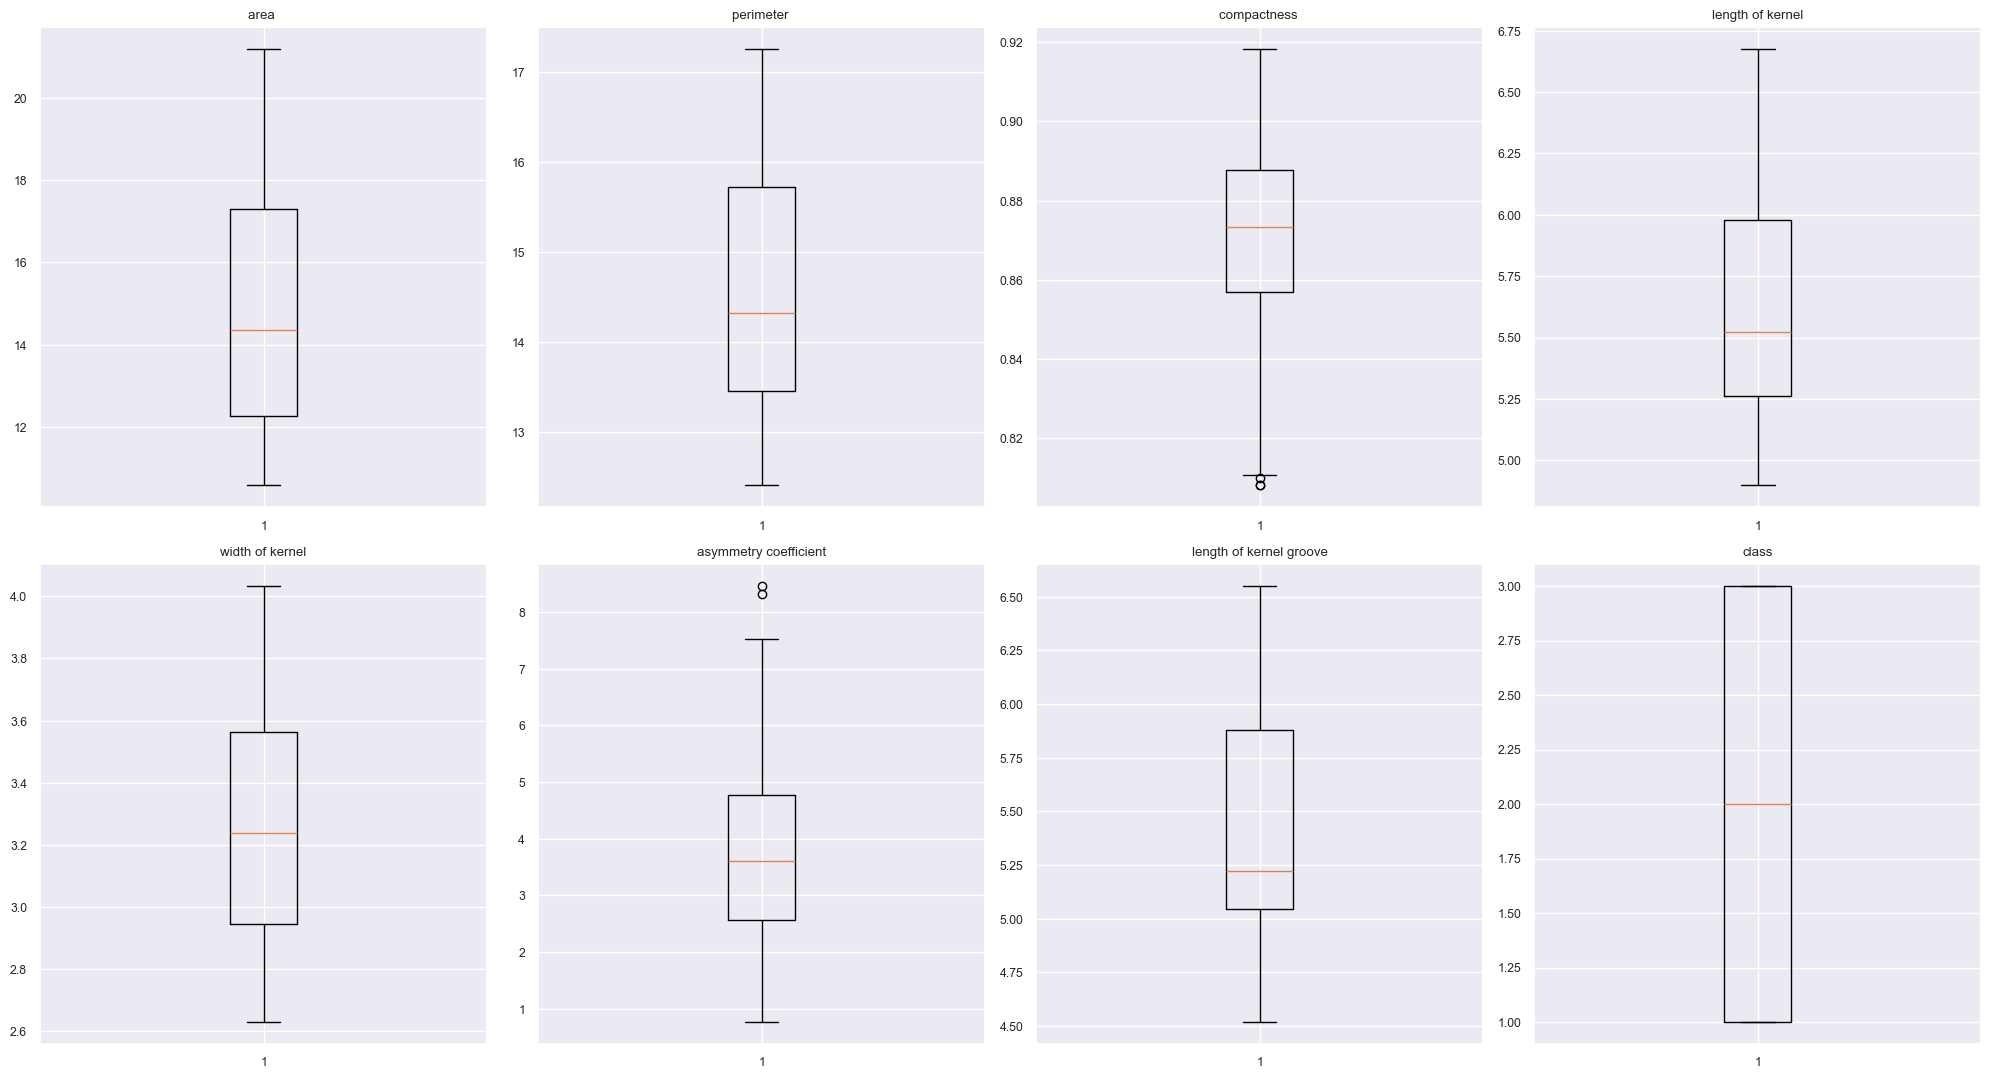

In [7]:
plt.figure(figsize=(20, 16))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    plt.boxplot(df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Label')

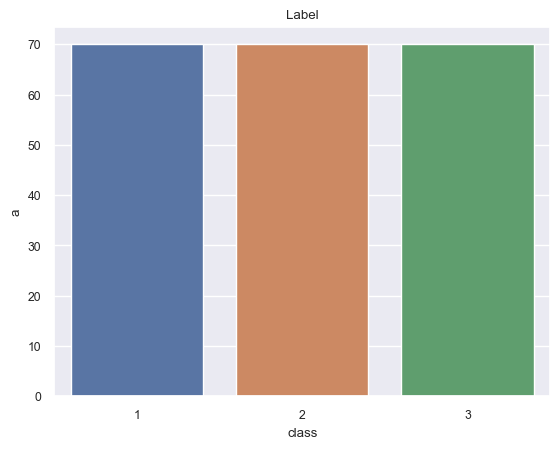

In [8]:
sns.countplot(data = df, x="class")
plt.ylabel("a")
plt.title("Label")

In [9]:
df['class'].value_counts()

class
1    70
2    70
3    70
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(df.drop('class', axis=1))  # rings 열 제외하고 표준화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환
scaled_df_standard

area   perimeter   compactness   length of kernel  width of kernel  \
0    0.142098    0.215462      0.000061          0.304218         0.141702   
1    0.011188    0.008224      0.428515         -0.168625         0.197432   
2   -0.192067   -0.360201      1.442383         -0.763637         0.208048   
3   -0.347091   -0.475333      1.039381         -0.688978         0.319508   
4    0.445257    0.330595      1.374509          0.066666         0.805159   
..        ...         ...           ...               ...              ...   
205 -0.915515   -1.043321      0.309736         -1.112048        -0.736716   
206 -1.246235   -1.288937     -0.844122         -1.105261        -1.230328   
207 -0.567571   -0.690247      0.733948         -0.888070        -0.070604   
208 -1.036090   -1.035645     -0.801701         -1.026077        -1.121521   
209 -0.877620   -0.935864     -0.110235         -0.872233        -0.755292   

     asymmetry coefficient  length of kernel groove  
0                -0.986152                -0.383577  
1                -1.788166                -0.922013  
2                -0.667479                -1.189192  
3                -0.960818                -1.229983  
4                -1.563495                -0.475356  
..                     ...                      ...  
205              -0.046135                -1.097413  
206               0.416540                -0.826156  
207               3.076588                -0.718060  
208              -0.068135                -0.742535  
209               1.291223                -0.703784  

[210 rows x 7 columns]

In [11]:
x=scaled_df_standard
X = x.values

In [12]:
y = df['class']
Y = pd.get_dummies(y).values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(157, 7) (53, 7) (157, 3) (53, 3)


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [15]:
inputs = tf.keras.Input(shape=(7,))

x1 = tf.keras.layers.Flatten()(inputs)
x2 = tf.keras.layers.Dense(64, activation='relu')(x1) 
x3 = tf.keras.layers.Dense(32, activation='relu')(x2)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x3)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,691 (10.51 KB)

 Trainable params: 2,691 (10.51 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 그냥 하니까 epoch를 2번만 돌려서 매개변수 추가
early_stopping = EarlyStopping(patience=5)


model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test), callbacks = [early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3375 - loss: 1.1393 - val_accuracy: 0.5660 - val_loss: 1.0458
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6301 - loss: 0.9987 - val_accuracy: 0.6981 - val_loss: 0.9075
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6637 - loss: 0.8712 - val_accuracy: 0.7547 - val_loss: 0.7932
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 0.7485 - val_accuracy: 0.7925 - val_loss: 0.7009
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.6553 - val_accuracy: 0.8302 - val_loss: 0.6214
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8491 - loss: 0.6094 - val_accuracy: 0.8679 - val_loss: 0.5514
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.5295 - val_accuracy: 0.8679 - val_loss: 0.4907
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.4710 - val_accuracy: 0.8679 - val_loss: 0.4369
Epoch 9

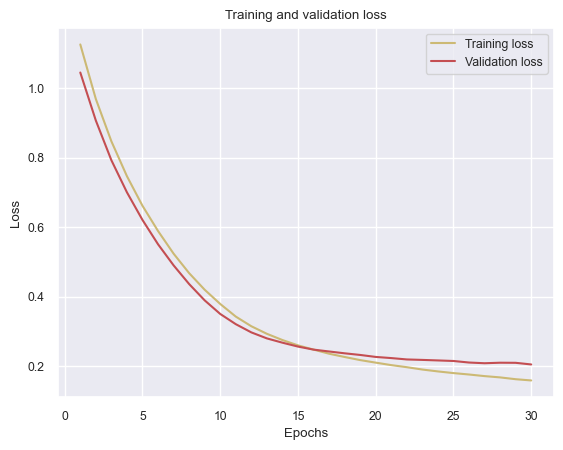

In [17]:
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.95      0.94      0.94        53

[[16  0  1]
 [ 2 19  0]
 [ 0  0 15]]
